# 1.Introduction

## 1.1 Project goals

This project is focused on analyzing yearly sales data from the Walmart store network. Walmart is an American chain of supermarkets and hypermarkets that offers a wide range of goods at low prices. The company has thousands of stores around the world. The goal of this project is to find seasonal sales trends, compare stores with each other, and find the impact of holidays, economic factors, and weather on sales.

## 1.2 About the dataset

The dataset used is a publicly available dataset from Kaggle called 'Walmart Dataset'. It contains historical sales data from 45 different Walmart stores for the period from 2010-02-05 to 2012-11-01. The dataset has 6435 rows and 8 columns. <br>

The columns are:<br>

Store – store ID<br>
Date – end date of the week<br>
Weekly_Sales – sales for the given week<br>
Holiday_Flag – 0 means a regular week, 1 means there is a holiday in that week<br>
Temperature – average temperature for the given week<br>
Fuel_Price – fuel price in the region for that week<br>
CPI – prevailing consumer price index in the region for that week<br>
Unemployment – prevailing unemployment rate in the region for that week<br>

In [1]:
# Import libraries and change the visualization style for future graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

plt.close("all")
plt.style.use('ggplot')

In [3]:
# Load data and change the data type of some columns

df = pd.read_csv('Walmart.csv')

df = df.astype({'Holiday_Flag': 'category', 'Store': 'category'})

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
# First few rows of the data

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 315.9 KB


In [6]:
# Statistical values of the columns

df.describe()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151
min,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000
std,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885


# 2. Feature Engineering

The goal of feature engineering in our case is to create new columns that will later be used for grouping data, their aggregation, and visualization.

In [7]:
# Creating a column that converts sales into millions

df['Weekly_Sales_mln'] = df['Weekly_Sales'] / 1_000_000  

In [8]:
# Creating a column with temperature converted to Celsius and rounded values

df['Temperature_Celsius'] = ( (df['Temperature'] - 32) / 1.8 ).round()

In [9]:
# Creating a column with fuel price converted to price per liter and rounded values

df['Fuel_Price_Liter'] = ( df['Fuel_Price'] / 3.78541 ).round(2)

In [10]:
# Creating a column with rounded values of the unemployment rate

df['Unemployment_Round'] = df['Unemployment'].round(1)

In [11]:
# Creating columns related to the month, year, and week number of the year

df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Week_Of_Year'] = df['Date'].dt.isocalendar().week

In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_mln,Temperature_Celsius,Fuel_Price_Liter,Unemployment_Round,Month,Year,Week_Of_Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.643691,6.0,0.68,8.1,February,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.641957,4.0,0.67,8.1,February,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.611968,4.0,0.66,8.1,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.409728,8.0,0.68,8.1,February,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.554807,8.0,0.69,8.1,March,2010,9


# 3. Data Analysis and Visualization

The goal of data analysis and visualization in our case is to answer these questions:<br>

1. Which store had the highest sales?
2. Which month has the highest sales?
3. What is the yearly sales trend?
4. How sales values are spread out?
5. How holidays affect sales?
6. Top 10 weeks with the highest average profit.
7. Which holiday week has the highest sales?
8. How economic and weather factors in the region influence sales?
9. How temperature affects sales?
10. How the unemployment rate in the region affects sales?
11. How fuel price affects sales?


## 3.1 Which store had the highest sales?

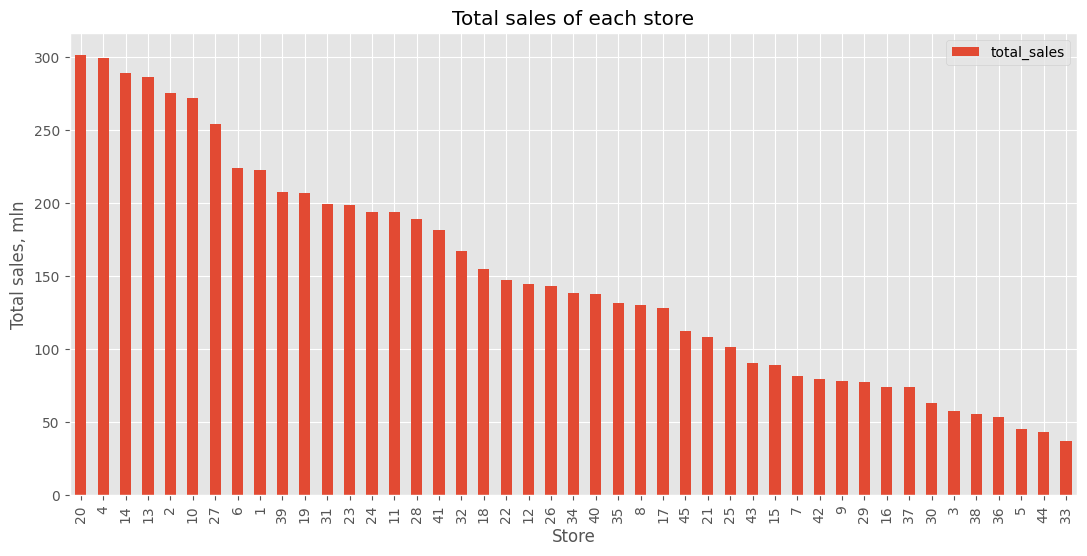

In [13]:

d = df.groupby('Store', observed=False).agg( total_sales=('Weekly_Sales_mln', "sum") )
d.sort_values(by='total_sales', inplace=True, ascending=False)



d.plot.bar(figsize=(13, 6), title='Total sales of each store', ylabel='Total sales, mln')
plt.show()


This graph shows the total sales of each store. We see that store 20 sold the most, while stores 4, 14, 13, 2, 10, and 27 also have very high sales – more than 250 million. The store with the lowest sales is store 33, with less than 50 million. We can see a big difference in sales values of some stores, for example, between store 33 and store 20 it is more than 6 times. Later, we will look at how economic factors and weather affect these sales.

## 3.2 Which month has the highest sales?

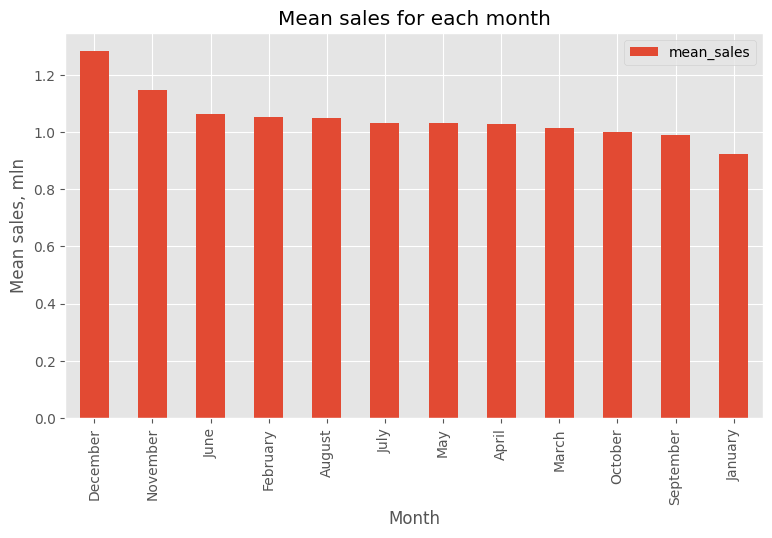

In [14]:

d = df.groupby('Month').agg( mean_sales=('Weekly_Sales_mln', 'mean') )
d.sort_values(by='mean_sales', ascending=False, inplace=True)



d.plot.bar( figsize=(9, 5), title='Mean sales for each month', ylabel='Mean sales, mln' )
plt.show()


This graph shows the average sales for each month. We see that December and November have the highest values, probably because these months have the biggest holidays like Thanksgiving, Christmas, and New Year. On later graphs, we will look at how holidays affect sales. The lowest sales are in January, probably because in the two months before people spent the most money. In the middle are the sales in June to September, and the sales in these months are almost the same.

## 3.3 What is the yearly sales trend?

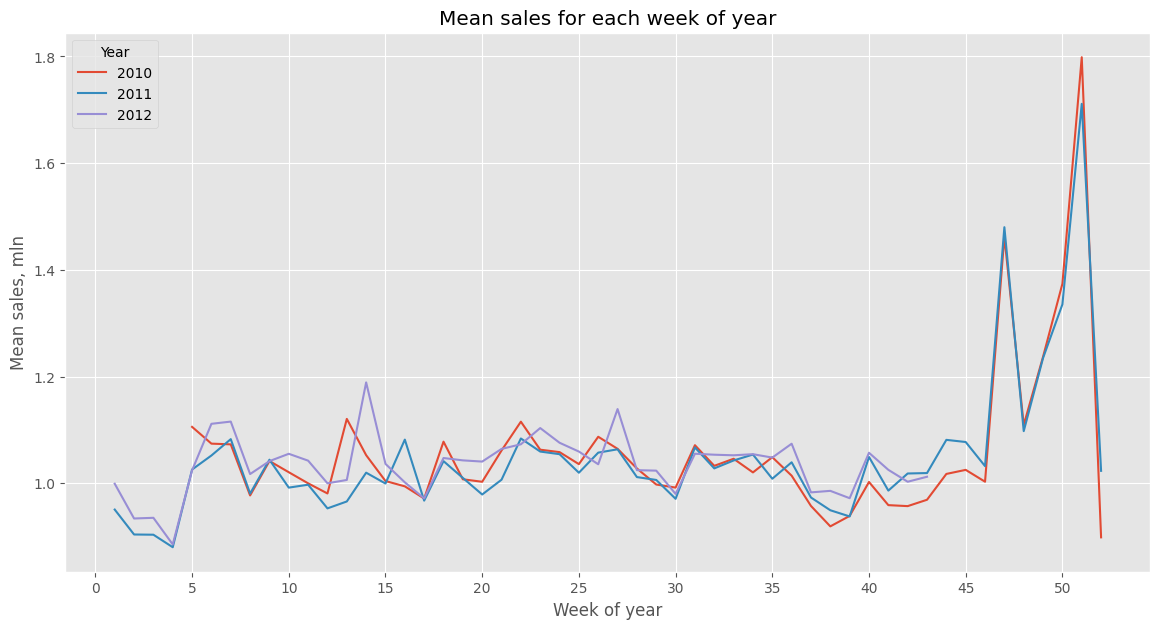

In [15]:

d = df.groupby(['Week_Of_Year', 'Year']).agg( mean_sales=('Weekly_Sales_mln', 'mean') )

d = d.unstack()
d.columns = d.columns.droplevel(level=0)



ax = d.plot.line( figsize=(14, 7), title='Mean sales for each week of year', xlabel='Week of year', ylabel='Mean sales, mln' )
ax.set_xticks(range(0, 55, 5))
plt.show()


This graph shows how sales change during the year. We see, as in the previous graph, that sales grow a lot at the end of the year, drop at the beginning, and stay almost the same during the other weeks with some local highs and lows.

## 3.4 How sales values are spread out?

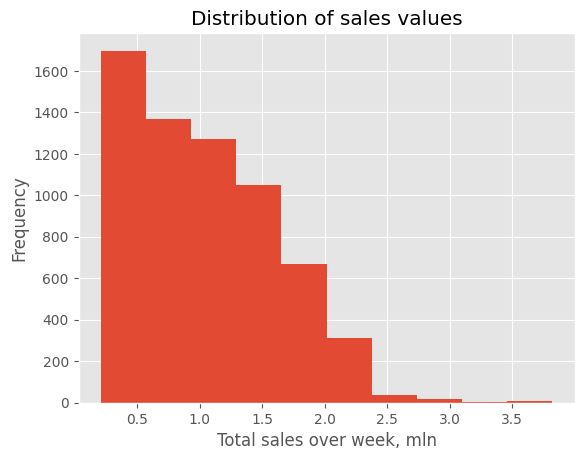

In [16]:

df['Weekly_Sales_mln'].plot.hist( xlabel='Total sales over week, mln', title='Distribution of sales values' )
plt.show()

This graph shows the distribution of weekly sales values. We see that most values are for weekly sales less than 0.5 million. The higher the sales value is, the less often it appears. Weekly sales higher than 2.5 million appear very rarely.

## 3.5 How holidays affect sales?

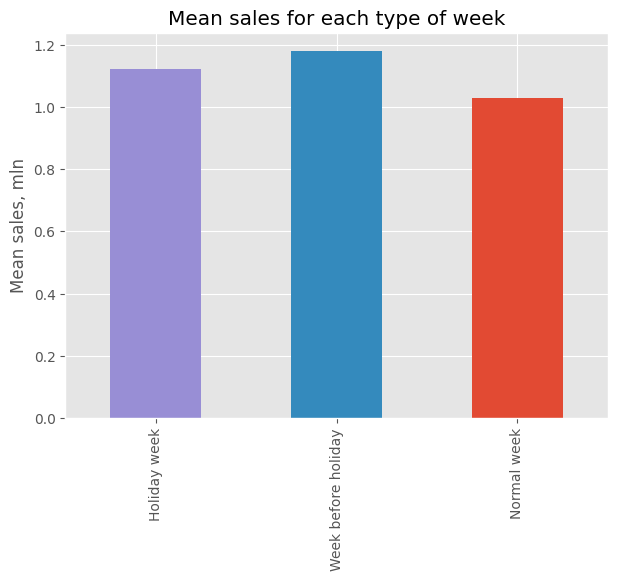

In [17]:

holiday = df[ df['Holiday_Flag'] == 1 ]['Date'].unique()
pre_holiday = df[ df['Date'].isin(holiday - pd.Timedelta(days=7)) ]['Date'].unique()            
normal = df[ (df['Holiday_Flag'] == 0)  &  ~df['Date'].isin(pre_holiday) ]['Date'].unique()


holiday_mean_sales = df[ df['Date'].isin(holiday) ]['Weekly_Sales_mln'].mean()
pre_holiday_mean_sales = df[ df['Date'].isin(pre_holiday) ]['Weekly_Sales_mln'].mean()
normal_mean_sales = df[ df['Date'].isin(normal) ]['Weekly_Sales_mln'].mean()


d = pd.Series([holiday_mean_sales, pre_holiday_mean_sales, normal_mean_sales], 
              index=['Holiday week', 'Week before holiday', 'Normal week'])



d.plot.bar(color=['#988ED5', '#348ABD', '#E24A33'], figsize=(7, 5), title='Mean sales for each type of week', ylabel='Mean sales, mln')
plt.show()


This graph shows the average sales for holiday weeks, pre-holiday weeks, and normal weeks. We see a difference between these types of weeks. The average sales in normal weeks are the lowest, then come holiday weeks, and pre-holiday weeks have a much higher value. This confirms the idea that sales in November and December are the highest because of holidays. The sales values in pre-holiday weeks are higher than in holiday weeks, probably because people buy things early before big holidays.

## 3.6 Top 10 weeks with the highest average profit.

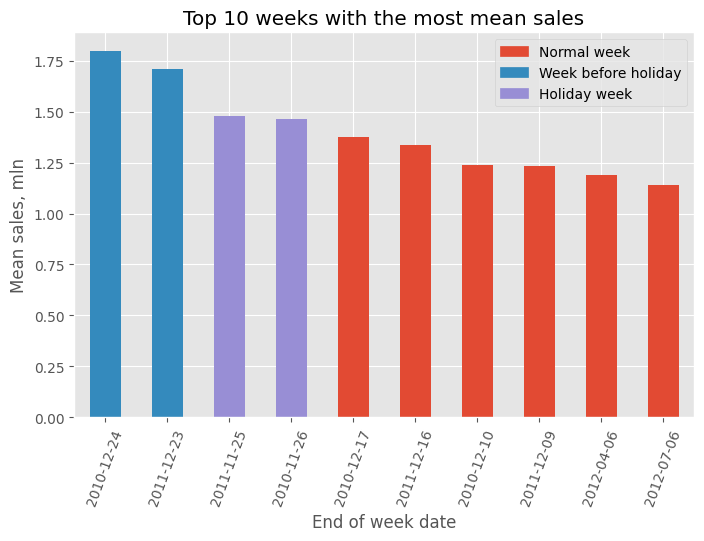

In [18]:

d = df.groupby('Date').agg( mean_sales=('Weekly_Sales_mln', 'mean') )

d.sort_values(by='mean_sales', ascending=False, inplace=True)

d = d.iloc[:10]

holiday_weeks = df[ df['Holiday_Flag'] == 1 ]['Date'].unique()
pre_holiday_weeks = df[ df['Date'].isin(holiday_weeks - pd.Timedelta(days=7)) ]['Date'].unique()     


colors_dict = {'normal_week': '#E24A33', 'pre_holiday_week': '#348ABD', 'holiday_week': '#988ED5'}
colors = []

for date in d.index.values:

    if date in holiday_weeks:

        colors.append( colors_dict['holiday_week'] )

    elif date in pre_holiday_weeks:

        colors.append( colors_dict['pre_holiday_week'] )

    else:

        colors.append( colors_dict['normal_week'] )



d.index = pd.to_datetime(d.index).strftime('%Y-%m-%d')



d['mean_sales'].plot.bar(color=colors, title='Top 10 weeks with the most mean sales', xlabel='End of week date', ylabel='Mean sales, mln', figsize=(8, 5))
plt.xticks(rotation=70)
plt.legend(handles=[
    Patch(color='#E24A33', label='Normal week'),
    Patch(color='#348ABD', label='Week before holiday'),
    Patch(color='#988ED5', label='Holiday week')
])
plt.show()


This graph shows the 10 most profitable weeks. We see again that the highest values are in pre-holiday weeks and holiday weeks, which connects to the previous graphs.

## 3.7 Which holiday week has the highest sales?

This graph shows the average sales for each holiday. We see that the values for Labour Day, Super Bowl, and Christmas are almost the same and similar to sales in normal weeks. The weeks with the holiday Thanksgiving have a much higher sales value.

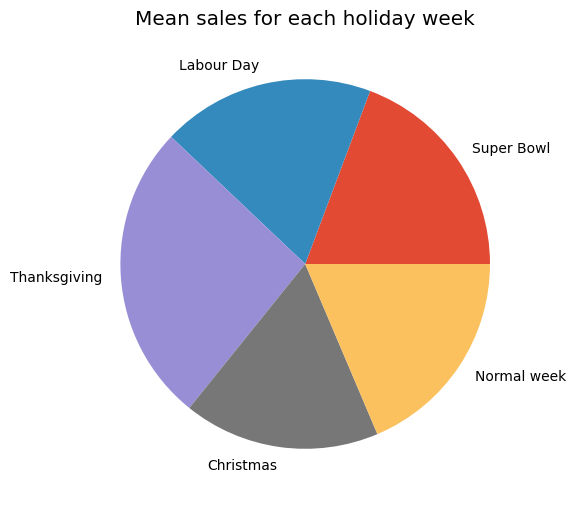

In [19]:

d = df[ df['Holiday_Flag'] == 1 ]

holiday_events = {'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
                  'Labour Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
                  'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23'],
                  'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28']}


values = []

for dates in holiday_events.values():

   dates = pd.to_datetime(dates)
   values.append( d[ d['Date'].isin(dates) ]['Weekly_Sales_mln'].mean() )


d = pd.Series(values, index=holiday_events.keys())

d.loc['Normal week'] = df[ df['Holiday_Flag'] == 0 ]['Weekly_Sales_mln'].mean()



d.plot.pie( figsize=(6, 6), title='Mean sales for each holiday week' )
plt.show()


This graph shows the average sales for each holiday. We see that the values for Labour Day, Super Bowl, and Christmas are almost the same and similar to sales in normal weeks. The weeks with the holiday Thanksgiving have a much higher sales value.

## 3.8 How economic and weather factors in the region influence sales?

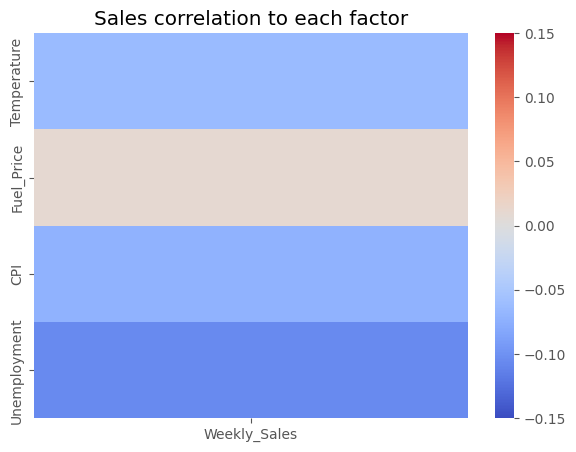

In [20]:

d = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

d = d.loc[ 'Temperature': , ['Weekly_Sales'] ]



plt.figure(figsize=(7,5))
sns.heatmap(d, vmax=0.15, vmin=-0.15, cmap="coolwarm")
plt.title('Sales correlation to each factor')
plt.show()


This graph shows the correlations between factors like Temperature, Fuel Price, CPI, Unemployment rate, and sales. We see that the correlation values are very low, somewhere between -0.1 and 0.1, which suggests that there is no strong relationship between these factors and sales. In the next graphs, we will see how sales depend on these factors.

## 3.9 How temperature affects sales?

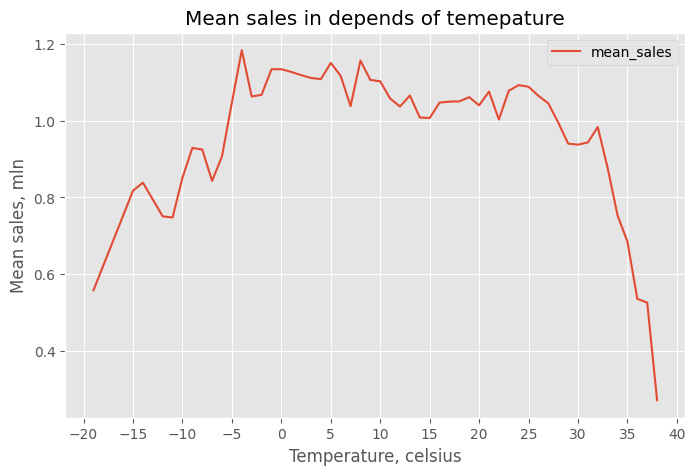

In [21]:

d = df.groupby('Temperature_Celsius').agg( mean_sales=('Weekly_Sales_mln', 'mean') )



ax = d.plot.line( figsize=(8, 5), title='Mean sales in depends of temepature', xlabel='Temperature, celsius', ylabel='Mean sales, mln' )
ax.set_xticks(range(-20, 45, 5))
plt.show()


This graph shows the relationship between the outside temperature and average sales. We see that the highest sales values are when the temperature is between -5 and 30 degrees. When the temperature is lower or higher than this range, sales go down a lot because this is not a comfortable temperature for people. I think that some seasonal offers, for example in summer: if you buy for more than 100 dollars – you get ice cream as a gift, and something similar for winter, could help balance sales during such extreme temperatures.

## 3.10 How the unemployment rate in the region affects sales?

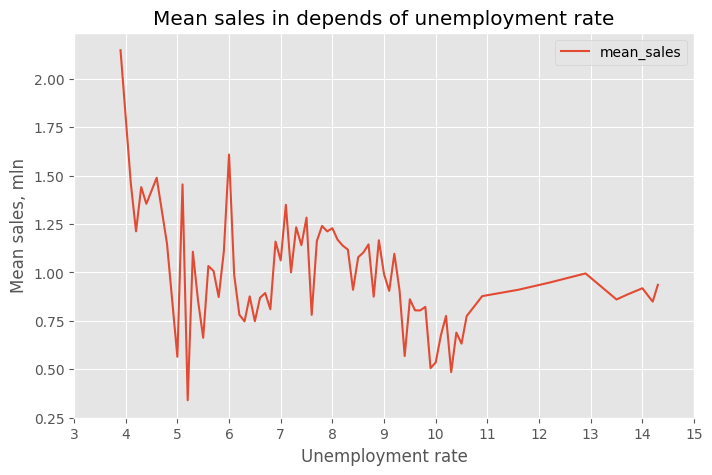

In [22]:

d = df.groupby('Unemployment_Round').agg( mean_sales=('Weekly_Sales_mln', 'mean') )



ax = d.plot.line( figsize=(8, 5), title=('Mean sales in depends of unemployment rate'), xlabel='Unemployment rate', ylabel='Mean sales, mln' )
ax.set_xticks(range(3, 16))
plt.show()


This graph shows the relationship between the unemployment rate and average sales. We see a general trend that when the unemployment rate goes up, sales go down, which is logical because the buying power of people without a job is lower than of people who have a job.

## 3.11 How fuel price affects sales?

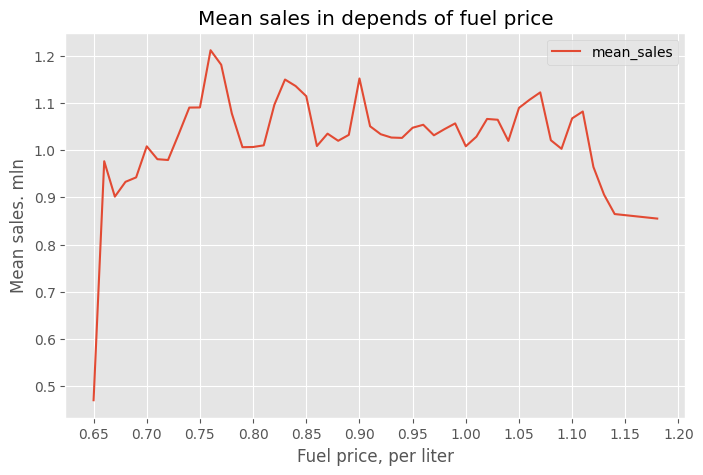

In [23]:

d = df.groupby('Fuel_Price_Liter').agg( mean_sales=('Weekly_Sales_mln', 'mean') )



ax = d.plot.line( figsize=(8, 5), title='Mean sales in depends of fuel price', xlabel='Fuel price, per liter', ylabel='Mean sales. mln' )
ax.set_xticks(np.arange(0.65, 1.25, 0.05))
plt.show()


This graph shows the relationship between fuel price and average sales. We see that the highest sales values are when the fuel price is between 0.75 and 1.10. When the price is outside this range, sales go down a lot. This is logical because when the fuel price is too low, the prices of goods also go down, so the total profit of the store decreases. On the other hand, when the fuel price is too high, buyers go to stores less often because fuel is expensive for them, and at the same time, the prices of goods go up.

# 4. Business Insights & Recommendations

1. Holiday weeks drive significant sales growth. <br>

    Before holidays, sales increase a lot. <br>
    Recommendation: Increase advertising campaigns and discount offers before holidays to maximize profit. <br><br>

2. Store performance varies widely. <br>

    Top stores by sales bring many times more profit than the others. <br>
    Recommendation: Study the practices of these stores and apply them to less profitable ones. <br><br>

3. Fuel prices show a weak/moderate correlation with sales. <br>

    Higher fuel prices can reduce store visits and therefore decrease sales in some weeks. <br>
    Recommendation: Offer extra incentives (for example, free delivery) when fuel prices are high. <br><br>

4. Sales show seasonal patterns. <br>

    There is a big increase in sales at the end of the year in November and December. <br>
    Recommendation: Plan to increase stock and staff during peak seasons. <br><br>

5. Temperature can affect sales. <br>

    At high temperatures, a decline in sales may occur. <br>
    Recommendation: Introduce seasonal promotions or special offers during periods of high temperatures to maintain sales levels.

